# HOMEWORK 6

### Author : Abhijay Ghildyal
### BSysE 530 Machine Vision

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Part 1

### Experiment 1: Find the proper thresholds for feature extraction

In [106]:
# cherry_img = cv2.imread('Cherries/DSC_0052.JPG')
# cherry_img = cv2.imread('Cherries/DSC_0054.JPG')
# cherry_img = cv2.imread('Cherries/DSC_0057.JPG')
cherry_img = cv2.imread('Cherries/DSC_0058.JPG')

In [107]:
ret, thresh = cv2.threshold( cherry_img[0:600,180:1000,0], 110, 255, 0)

contours, hierarchy = cv2.findContours( thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [108]:
img_ = cherry_img[0:600,180:1000,0].copy()
img_forRGB_features = cherry_img[0:600,180:1000,:].copy()
img_forHSV_features = cv2.cvtColor( cherry_img[0:600,180:1000,:], cv2.COLOR_BGR2HSV)

i = 0
contourArea = []
contourPerimeter = []
contourSolidity = []
meanBlue = []
meanGreen = []
meanRed = []
meanHue = []
meanSaturation = []
meanValue = []


rec_Width = 1
font_weight = 2
font_size = 1
font = cv2.FONT_HERSHEY_SIMPLEX

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 200 and area<4000:
        i+=1
        contourArea.append(area)
        contourPerimeter.append(round(cv2.arcLength(cnt,True),2))
        
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        solidity = float(area)/hull_area
        contourSolidity.append(solidity)
        
        # why not compactness
        
        mask = np.zeros((img_forRGB_features.shape[0:2]))
        cv2.drawContours(mask,[cnt],0,255,-1)
        mask = (mask<1).astype(int)
        meanBlue.append(np.ma.array(img_forRGB_features[:,:,0], mask = mask).mean())
        meanGreen.append(np.ma.array(img_forRGB_features[:,:,1], mask = mask).mean())
        meanRed.append(np.ma.array(img_forRGB_features[:,:,2], mask = mask).mean())
        
        meanHue.append(np.ma.array(img_forHSV_features[:,:,0], mask = mask).mean())
        meanSaturation.append(np.ma.array(img_forHSV_features[:,:,1], mask = mask).mean())
        meanValue.append(np.ma.array(img_forHSV_features[:,:,2], mask = mask).mean())
        
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img_,(x,y),(x+w,y+h),(0,255,0),rec_Width)
        cv2.putText(img_, str(i),(x,y-3), font, font_size,(0,255,255), font_weight, cv2.LINE_AA)
        
        if area<1000:
            if x<220:
                label = "Light Color Rectangles"
            elif x<320:
                label = "Medium Color Rectangles"
            else:
                label = "Dark Color Rectangles"
        else:
            if y<110:
                label = "Light Color Cherries"
            elif y<300:
                label = "Medium Color Cherries"
            else:
                label = "Dark Color Cherries"
        print (i, area, label, meanRed[i-1])

1 585.0 Dark Color Rectangles 36.43512658227848
2 570.0 Dark Color Rectangles 40.30194805194805
3 547.5 Medium Color Rectangles 51.24451939291737
4 595.0 Medium Color Rectangles 59.80529595015577
5 583.5 Medium Color Rectangles 70.58730158730158
6 566.5 Light Color Rectangles 115.38499184339315
7 554.0 Light Color Rectangles 127.88333333333334
8 3097.0 Dark Color Cherries 42.6740467404674
9 3195.5 Dark Color Cherries 50.30199940316324
10 3008.5 Dark Color Cherries 42.39200251889169
11 2931.5 Dark Color Cherries 49.64324846922333
12 3438.5 Dark Color Cherries 44.116768123962366
13 3553.5 Dark Color Cherries 43.938589434164655
14 2826.5 Medium Color Cherries 74.35883547731889
15 3245.5 Medium Color Cherries 50.60405643738977
16 2967.5 Medium Color Cherries 69.11690821256039
17 3336.5 Medium Color Cherries 55.57705479452055
18 3162.0 Medium Color Cherries 67.79319686935581
19 3382.0 Medium Color Cherries 56.05806087936866
20 2667.0 Light Color Cherries 131.18810117563234
21 2706.5 Light C

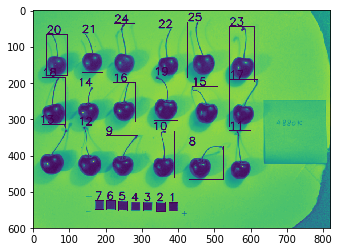

In [109]:
plt.imshow(img_)

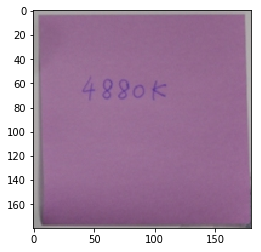

In [110]:
plt.imshow(cherry_img[245:425,810:990,:])

In [29]:
stickynote = cherry_img[245:425,810:990,:].copy()

In [30]:
area = stickynote.shape[0]*stickynote.shape[1]
perimeter = 2*(stickynote.shape[0]+stickynote.shape[1])
solidity = 0.98

meanBlue = stickynote[:,:,0].mean()
meanGreen = stickynote[:,:,1].mean()
meanRed = stickynote[:,:,2].mean()

stickynote_HSV = cv2.cvtColor( stickynote, cv2.COLOR_BGR2HSV)
meanHue = stickynote_HSV[:,:,0].mean()
meanSaturation = stickynote_HSV[:,:,1].mean()
meanValue = stickynote_HSV[:,:,2].mean()

### Experiment 2: Extract features

In [84]:
def get_features(cherry_img):
    
    ret, thresh = cv2.threshold( cherry_img[0:600,180:1000,0], 110, 255, 0)
    contours, hierarchy = cv2.findContours( thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # img_ = cherry_img[0:600,180:1000,0].copy()
    img_forRGB_features = cherry_img[0:600,180:1000,:].copy()
    img_forHSV_features = cv2.cvtColor( cherry_img[0:600,180:1000,:], cv2.COLOR_BGR2HSV)

    i = 0
    contourArea = []
    contourPerimeter = []
    contourSolidity = []
    meanBlue = []
    meanGreen = []
    meanRed = []
    meanHue = []
    meanSaturation = []
    meanValue = []


    rec_Width = 1
    font_weight = 1
    font_size = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    area = stickynote.shape[0]*stickynote.shape[1]
    perimeter = 2*(stickynote.shape[0]+stickynote.shape[1])
    solidity = 0.98

    meanBlue = stickynote[:,:,0].mean()
    meanGreen = stickynote[:,:,1].mean()
    meanRed = stickynote[:,:,2].mean()

    stickynote_HSV = cv2.cvtColor( stickynote, cv2.COLOR_BGR2HSV)
    meanHue = stickynote_HSV[:,:,0].mean()
    meanSaturation = stickynote_HSV[:,:,1].mean()
    meanValue = stickynote_HSV[:,:,2].mean()
    label = "Sticky notes"
    
#     print (area, perimeter, solidity, meanBlue, meanGreen, meanRed, meanHue, meanSaturation, meanValue, label)
    features = np.array( [area, perimeter, solidity, meanBlue, meanGreen, meanRed, meanHue, meanSaturation, meanValue, label])

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 200 and area<4000:
            i+=1
            contourArea.append(area)
            contourPerimeter.append(round(cv2.arcLength(cnt,True),2))

            hull = cv2.convexHull(cnt)
            hull_area = cv2.contourArea(hull)
            solidity = float(area)/hull_area
            contourSolidity.append(solidity)

            # why not compactness

            mask = np.zeros((img_forRGB_features.shape[0:2]))
            cv2.drawContours(mask,[cnt],0,255,-1)
            mask = (mask<1).astype(int)
            meanBlue = np.ma.array(img_forRGB_features[:,:,0], mask = mask).mean()
            meanGreen = np.ma.array(img_forRGB_features[:,:,1], mask = mask).mean()
            meanRed = np.ma.array(img_forRGB_features[:,:,2], mask = mask).mean()

            meanHue = np.ma.array(img_forHSV_features[:,:,0], mask = mask).mean()
            meanSaturation = np.ma.array(img_forHSV_features[:,:,1], mask = mask).mean()
            meanValue = np.ma.array(img_forHSV_features[:,:,2], mask = mask).mean()

            x,y,w,h = cv2.boundingRect(cnt)
            # cv2.rectangle(img_,(x,y),(x+w,y+h),(0,255,0),rec_Width)
            # cv2.putText(img_, str(i),(x,y-3), font, font_size,(0,255,255), font_weight, cv2.LINE_AA)

            if area<1000:
                if x<220:
                    label = "Light Color Rectangles"
                elif x<320:
                    label = "Medium Color Rectangles"
                else:
                    label = "Dark Color Rectangles"
            else:
                if y<110:
                    label = "Light Color Cherries"
                elif y<300:
                    label = "Medium Color Cherries"
                else:
                    label = "Dark Color Cherries"
            
#             print (np.array( area, perimeter, solidity, meanBlue, meanGreen, meanRed, meanHue, meanSaturation, meanValue, label))
            features_ = np.array( [area, perimeter, solidity, meanBlue, meanGreen, meanRed, meanHue, meanSaturation, meanValue, label])
#             print(features.shape,features_.shape)
            features = np.vstack((features,features_))
    return features

In [85]:
features = np.array([])
for cherry_img in glob('Cherries/*'):
    features_ = get_features(cv2.imread(cherry_img))
    if len(features)>0:
        features = np.vstack((features,features_))
    else:
        features = features_

Example of the dataset created:

In [123]:
for feature_ in features[0:10]:
    print (feature_)

['32400' '720' '0.98' '148.51141975308641' '108.38358024691358'
 '144.84277777777777' '146.16873456790123' '69.77077160493828'
 '148.82055555555556' 'Sticky notes']
['532.0' '720' '0.981549815498155' '63.89948006932409'
 '56.901213171577126' '55.653379549393414' '116.8526863084922'
 '46.16637781629116' '63.99306759098787' 'Dark Color Rectangles']
['518.5' '720' '0.9932950191570882' '68.01953818827708'
 '58.66785079928952' '71.60923623445827' '150.7602131438721'
 '64.8152753108348' '72.6696269982238' 'Dark Color Rectangles']
['497.5' '720' '0.9910358565737052' '71.65249537892791'
 '62.20332717190388' '105.8539741219963' '161.66728280961183'
 '118.62846580406655' '105.87060998151571' 'Medium Color Rectangles']
['542.5' '720' '0.9890610756608933' '71.43367346938776'
 '63.256802721088434' '123.47108843537416' '153.59013605442178'
 '137.1360544217687' '123.47108843537416' 'Medium Color Rectangles']
['530.5' '720' '0.9689497716894977' '67.27826086956522'
 '62.34086956521739' '142.93043478260

### Experiment 3: Use the feature set to build a Bayesian Classifier

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
trainLen = int(features.shape[0]*0.75)

In [117]:
X = features[0:trainLen,:8].astype(np.float)
Y = features[0:trainLen,9]
test_X = features[trainLen::,:8].astype(np.float)
test_Y = features[trainLen::,9]

In [118]:
gnb = GaussianNB()
model = gnb.fit(X, Y)

In [120]:
predicted = model.predict(X)
print ("Training Accuracy: ",(predicted==Y).sum()/len(Y))

Training Accuracy:  0.8775510204081632


In [121]:
predicted = model.predict(test_X)
print ("Testing Accuracy: ",(predicted == test_Y).sum()/len(test_Y))

Testing Accuracy:  0.8181818181818182


### Experiment 4: Use the feature set to build a Neural Network Classifier

In [94]:
from sklearn.neural_network import MLPClassifier

In [152]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes= \ 
                    (16, 32, 32, 16), random_state=1, max_iter=2000)

In [153]:
model = clf.fit(X, Y)

In [154]:
print("Training Accuracy: ", (model.predict(X)==Y).sum()/len(Y))

Training Accuracy:  0.9387755102040817


In [156]:
print("Testing Accuracy: ",(model.predict(test_X)==test_Y).sum()/len(test_Y))

Testing Accuracy:  0.8484848484848485


## Part 2

### Experiment: Motion History and Motion Energy

In [ ]:
import numpy as np
import cv2

def get_colors(img, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(img))

In [ ]:
fps=30
cap = cv2.VideoCapture('IMG-8933.MOV')
cap.set(cv2.CAP_PROP_FPS, fps)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()
ret, frame = cap.read()
fgmask = np.ones((frame.shape[0:2]))

i=0
while(1):
    ret, frame = cap.read()
    if ret != True:
        break

    fgmask_new = fgbg.apply(frame)
    fgmask_new = cv2.morphologyEx(fgmask_new, cv2.MORPH_OPEN, kernel)

    fgmask = fgmask*0.995
    fgmask = fgmask + (fgmask_new/255)
#     fgmask = fgmask - fgmask_new

    plt.imshow(fgmask, cmap="copper")

    i+=1
    plt.savefig('motion_history/img_'+str('{:04d}'.format(i)))
    
    plt.show()
     
cap.release()
print ("Done")

In [ ]:
fps=30
cap = cv2.VideoCapture('IMG-8933.MOV')
cap.set(cv2.CAP_PROP_FPS, fps)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

ret, frame = cap.read()
fgmask = np.ones((frame.shape[0:2]))

i=0
while(1):
    ret, frame = cap.read()
    if ret != True:
        break

    fgmask_new = fgbg.apply(frame)
    fgmask_new = cv2.morphologyEx(fgmask_new, cv2.MORPH_OPEN, kernel)

    fgmask = fgmask*0.9
    fgmask = fgmask + (fgmask_new/255)

    plt.imshow(fgmask, cmap="plasma")
    
    i+=1
    plt.savefig('motion_energy/img_'+str('{:04d}'.format(i)))
cap.release()
print ("Done")